# Project Summary

In [1]:
from game import Game
from investigate_game import InvestigateGame
from random_player import RandomPlayer
from min_max import MinMaxPlayer, AlphaBetaMinMaxPlayer
from q_learning import QLearningRLPlayer
from monte_carlo import MonteCarloRLPlayer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_training_stats(rewards: list, step_size: int, switch_ratio: int | None = None) -> None:
    """
    Given a training list of rewards, this function plots the averages of the rewards
    using a given step size.

    Args:
        rewards: the rewards achieved during training time;
        step: the step size to be used to plot an average value;
        switch_ratio: define the moment in which minmax started playing-

    Returns:
        None.
    """

    # https://stackoverflow.com/questions/15956309/averaging-over-every-n-elements-of-a-numpy-array
    # compute the averages
    averages = np.mean(np.array(rewards).reshape(-1, step_size), axis=1)

    # define the width and height of the figure in inches
    plt.figure(figsize=(10, 5))
    # plot the averages
    plt.plot(averages, color='red', marker='o', linestyle='dashed', label='Training')
    # if minmax played
    if switch_ratio is not None:
        # compute the exact moment
        switch_moment = int(len(rewards) / step_size * switch_ratio)
        # print a vertical line at the moment minmax started playing
        plt.axvline(x=switch_moment, color='green', label='MinMax Starts Playing')
    # specify the title
    plt.title('Training Summary')
    # specify the x-axis label
    plt.xlabel('# of the step')
    # specify the y-axis label
    plt.ylabel('Mean rewards value')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

## Train a Q-learning player

In [ ]:
# create the Q-learning player
q_learning_rl_agent = QLearningRLPlayer(
    n_episodes=20_000,
    alpha=0.1,
    gamma=0.99,
    min_exploration_rate=0.01,
    exploration_decay_rate=1e-4,
    minmax=True,
)
# train the Q-learning player
q_learning_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {len(q_learning_rl_agent._q_table.keys())}')
# serialize the Q-learning player
q_learning_rl_agent.save('agents/q_learning_agent_1.pkl')

In [ ]:
# get the rewards
rewards = q_learning_rl_agent.rewards
# plot the averages of the training rewards
plot_training_stats(rewards, step_size=5, switch_ratio=0.8)

## Train a Monte Carlo learning player

In [3]:
# create the Q-learning player
monte_carlo_rl_agent = MonteCarloRLPlayer(
    n_episodes=20_000,
    gamma=0.99,
    min_exploration_rate=0.01,
    exploration_decay_rate=1e-4,
    minmax=True,
)
# train the Q-learning player
monte_carlo_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {len(monte_carlo_rl_agent._q_table.keys())}')
# serialize the Q-learning player
monte_carlo_rl_agent.save('agents/monte_carlo_rl_agent_1.pkl')

# explored state: 331217 - Current exploration rate: 0.135349: 100%|██████████| 20000/20000 [12:28<00:00, 26.71it/s]


** Last 1_000 episodes - Mean rewards value: 2.79 **
** Last rewards value: 10 **
Number of explored states: 331217


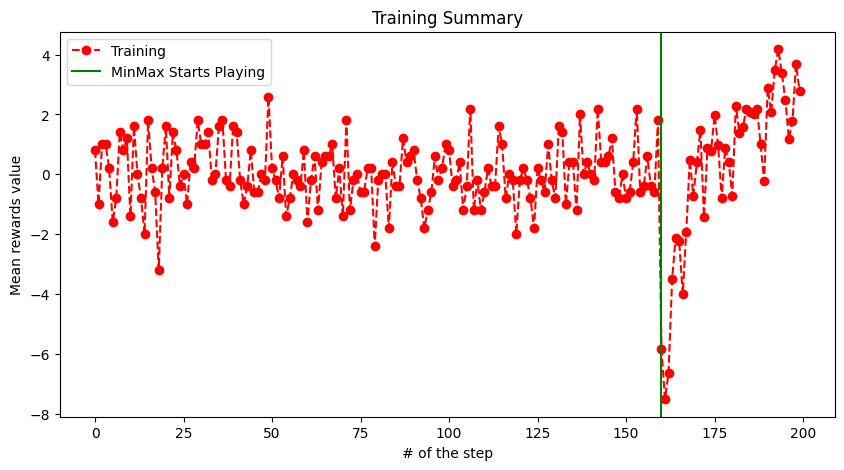

In [4]:
# get the rewards
rewards = monte_carlo_rl_agent.rewards
# plot the averages of the training rewards
plot_training_stats(rewards, step_size=100, switch_ratio=0.8)

## Play Games

In [6]:
# create the first player
player1 = MinMaxPlayer(player_id=0, depth=1, symmetries=False)
# create the second player
player2 = monte_carlo_rl_agent
# create a new game
game = InvestigateGame(Game())
# LET'S BATTLE
winner = game.play(player1, player2, max_steps_draw=10)

-- BEGINNING OF THE GAME --
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 0) to the bottom
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (4, 3) to the top
⬜️⬜️⬜️⬜️⭕️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 0) to the right
⬜️⬜️⬜️⭕️❌
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (1, 4) to the top
⬜️⭕️⬜️⭕️❌
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 0) to the bottom
⬜️⭕️⬜️⭕️❌
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️


KeyboardInterrupt: 

In [ ]:
game._board

In [ ]:
from random import choice
from symmetry import Symmetry

player_id = game.get_current_player()
new_game, state_repr_index, trasformation_index = monte_carlo_rl_agent._map_state_to_index(game, player_id)
# get all possible transitions
canonical_actions, _ = zip(*new_game.generate_possible_transitions(player_id))
# if the current state is known
if state_repr_index in monte_carlo_rl_agent._q_table:
    # take the action with maximum return of rewards
    canonical_action = max(canonical_actions, key=lambda a: monte_carlo_rl_agent._q_table[state_repr_index][a])
else:
    # choose a random action
    canonical_action = choice(canonical_actions)

# get action for original state by mapping
action = Symmetry.get_action_from_canonical_action(canonical_action, trasformation_index)

# return the action
action

In [ ]:
game._board

In [ ]:
max(canonical_actions, key=lambda a: monte_carlo_rl_agent._q_table[state_repr_index][a])

In [ ]:
np.rot90(game._board, k=1)

In [ ]:
Symmetry.get_transformed_states(game)[trasformation_index]._board

In [ ]:
new_game._board

In [ ]:
trasformation_index

In [ ]:
monte_carlo_rl_agent = MonteCarloRLPlayer(
    n_episodes=20_000,
    gamma=0.99,
    min_exploration_rate=0.01,
    exploration_decay_rate=1e-4,
    minmax=True,
)
# serialize the Q-learning player
monte_carlo_rl_agent.load('agents/monte_carlo_rl_agent_1.pkl')